<a href="https://colab.research.google.com/github/rizalr04/Algorithm-Machine-Learning/blob/main/Regresi_Linear_dengan_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pembuka** 
Assalamu'alaikum warahmatullahi wabarakatuh. Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan HidayahNya kepada kita semua. Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan ketiga Program Training **Algoritma Machine** Learning Kelas Mahir. 

Pada pertemuan ini kamu akan belajar: 
* Model Regresi Linear Sederhana 
* Ordinary Least Mean Square 
* Contoh Perhitungan Manual Regresi Linear dengan OLS 
* Regresi Linear Python From Scratch 


## **Model Regresi Linear Sederhana**



Regresi Linear adalah metode untuk mendefinisikan hubungan linear antara variabel dependen **Y** dan variabel independen **X**. Secara sederhana dapat dituliskan dalam formula berikut:
$$
\begin{eqnarray}
Y_i &=& b_{0} + b_{1}. x_{i} + \epsilon_{i}\\
\end{eqnarray}
$$
yang mana $Y_i$ adalah variabel dependen $X_i$ adalah variabel independen,$\epsilon$ adalah kesalahan acak, $b_{0}$ disebut sebagai intercept dan $b_{1}$ isebut sebagai koefisien regresi yang dapat diestimasi berdasarkan data $Y_{i}$ dan $X_{i}$ yang diberikan. Koefisien $b_{0}$ juga biasa disebut sebagai bias. Tujuan utama dari model ini adalah untuk
mengambarkan garis linear dengan kesesuaian terbaik(*best fit*) antara X dan Y yang mengestimasi hubungan
antara X dan Y. 

Lalu bagaimana untuk mengestimasi koefisien tersebut? Salah satu pendekatan yang dapat dilakukan adalah menggunakan metode **Ordinary Least Mean Square Method**. Pada python notebook ini, kita akan mengimplementasikan metode Ordinary Least Mean Square Method.

## **Ordinary Least Mean Square**

Sebelumnya kita telah membahas tentang estimasi hubungan antara X dan Y pada sebuah garis. Misalnya, kita sediakan input dan output sampel, kemudian kita memplot titik titik data ini pada grafik 2 dimensi, maka akan dihasilkan grafik seperti di bawah ini:

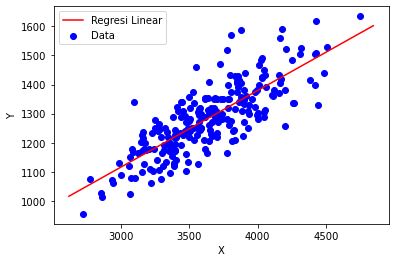

Garis merah pada grafik adalah hubungan sesungguhnya yang ingin disetimasi. Kita berusaha untuk meminimalkan kesalahan model yang kita bangun. Garis ini adalah garis yang paling tepat menggambarkan hubungan antara data X dan Y dengan melewati sebagian besar titik data dan memiliki kesalahan yang paling minimal. Kesalahan ini berupa jarak titik data ke garis estimasi model ini. Secara konseptual kesalahan ini diilustrasikan pada gambar di bawah ini. 

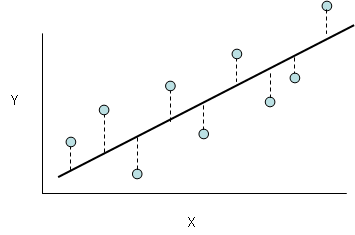


Dan kesalahan total model linier adalah jumlah kesalahan dari setiap titiknya, yaitu : $$\sum_{i=1}^{n} \epsilon_{i}^{2}$$
$\epsilon_{i}$ = Jarak antara garis ke titik data ke-i

$n$ = Jumlah total titik data

Formula di atas diperoleh dari:
$$
\begin{eqnarray}
y_i &=& b_{0} + b_{1}. x_{i} + \epsilon_{i}\\
\epsilon_i &=& y_{i} - b_{0} - b_{1}. x_{i}\\
\sum_{i=1}^{n} \epsilon_{i}^{2} &=& \sum_{i=1}^{n} (y_{i} - b_{0} - b_{1}. x_{i})^2 \\
\end{eqnarray}
$$
Pada baris terakhir persamaan di atas kita **mengkuadratkan kesalahan yang berupa jarak antara garis estimasi dengan titik data**. Kita dapat mengkuadratkan masing-masing jarak karena terdapat beberapa titik di atas garis dan beberapa di bawahnya. Kemudian, untuk memperoleh model terbaik jarak tersebut dapat kita minimumkan. Misal $ \sum_{i=1}^{n} \epsilon_{i}^{2} = J$ 

Ide Dasar Metode OLS: **Nilai minimum dari fungsi kesalahan $\sum_{i=1}^{n} \epsilon_{i}^{2}$ **terjadi saat turunan pertama terhadap koefisien** $b_{0}$ dan $b_{1}$ **sama dengan 0**. **Ini merujuk pada konsep dasar turunan fungsi dalam kalkulus yaitu nilai minimum suatu fungsi terjadi saat turunan pertamanya sama dengan 0.**

Mencari nilai minimum untuk $b_{0}$ 


\begin{eqnarray}
J &=& \sum_{i=1}^{n} (y_{i} - b_{0} - b_{1}. x_{i})^2\\\\
\frac{\partial J}{\partial b_{0}} &=& 2 \sum_{i=1}^{n} (y_{i} - b_{0} - b_{1}. x_{i})^{(2-1)} .-1\\\\
\frac{\partial J}{\partial b_{0}} &=& 2 \sum_{i=1}^{n} (y_{i} - b_{0} - b_{1}. x_{i})^{(2-1)} .-1\\\\
\frac{\partial J}{\partial b_{0}} &=& -2 \sum_{i=1}^{n} (y_{i} - b_{0} - b_{1}. x_{i})\\\\
\frac{\partial J}{\partial b_{0}} &=& 0\\\\
\sum_{i=1}^n (y_{i} - \hat{b_{0}} - \hat{b_{1}}. x_{i}) &=& 0\\\\
\sum_{i=1}^n y_{i} - n\hat{b_{0}} - \hat{b_{1}}\sum_{i=1}^n  x_{i} &=& 0\\\\
n\hat{b_{0}} &=& \sum_{i=1}^n y_{i} - \hat{b_{1}}\sum_{i=1}^n  x_{i}\\\\
\hat{b_{0}} &=& \frac{\sum_{i=1}^n y_{i} - \hat{b_{1}}\sum_{i=1}^n  x_{i}}{n}\\\\
\hat{b_{0}} &=& \bar{y} - \hat{b_{i}}x\\\\
\end{eqnarray}

Sehingga diperoleh formula untuk $b_0$ adalah 
$$
\begin{eqnarray}
\hat{b_{0}} &=& \bar{y} - \hat{b_{i}}x\\\\
\end{eqnarray}
$$

Mencari nilai minimum untuk $b_1$ 
$$
\begin{eqnarray}
J &=& \sum_{i=1}^n (y_{i} - b_{0} - b_{i}.x_{i})^2\\
\frac{\partial J}{\partial b_{1}} &=& 2 \sum_{i=1}^n (y_{i} - b_{0} - b_{i}.x_{i})^{(2-1)}.(-x_{i})\\
\frac{\partial j}{\partial b_{1}} &=& -2 \sum_{i=1}^n (x_{i}.y_{i} - b_{0}.x_{i} - b_{1}.x_{i}^2)\\
\frac{\partial j}{\partial b_{i}} &=& 0\\
\sum_{i=1}^n x_{i}.y_{i} - \hat{b_{0}} \sum_{i=1}^n x_{i} - \hat{b_{1}} \sum_{i=1}^n x_{i}^2 &=& 0\\
\sum_{i=1}^n x_{i}.y_{i} - ( \frac{\sum_{i=1}^n y_{i} - \hat{b_{1} \sum_{i=1}^n x_{i}}}{n} ) \sum_{i=1}^n x_{i} - \hat{b_{1}} \sum_{i=1}^n x_{i}^2 &=& 0\\
\sum_{i=1}^n x_{i}.y_{i} - \frac{\sum_{i=1}^n x_{i} \sum_{i=1}^n y_{i}}{n} + \hat{b_1}\frac{(\sum_{i=1}^n x_{i})^2}{n} - \hat{b_{1}} \sum_{i=1}^n x_{i}^2 &=& 0\\
\hat{b_{1}}(\frac{(\sum_{i=1}^n x_{i})^2}{n} - \sum_{i=1}^n x_{i}^2) &=& \frac{\sum_{i=1}^n x_{i} \sum_{i=1}^n y_{i}}{n} - \sum_{i=1}^n x_{i}.y_{i}\\
\hat{b_{1}} &=& \frac{\sum_{i=1}^n x_{i}.y_{i} - \frac{\sum_{i=1}^n x_{i} \sum_{i=1}^n y_{i}}{n}}{\sum_{i=1}^n x_{i}^2 - \frac{(\sum_{i=1}^n x_{i})^2}{n}}\\
\end{eqnarray}
$$
sehingga diperoleh formula untuk $b_{1}$ adalah
\begin{eqnarray}
\hat{b_{1}} &=& \frac{\sum_{i=1}^n x_{i}.y_{i} - \frac{\sum_{i=1}^n x_{i} \sum_{i=1}^n y_{i}}{n}}{\sum_{i=1}^n x_{i}^2 - \frac{(\sum_{i=1}^n x_{i})^2}{n}}\\
\end{eqnarray}
Persamaan terakhir bisa ditulis ulang untuk kemudahan pemrograman sebagai berikut: 
\begin{eqnarray}
\hat{b_{1}} &=& \frac{\sum_{i=1}^n (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^n (x_{i} - \bar{x})^2}
\end{eqnarray}


## **Contoh Perhitungan Manual Regresi Linear dengan OLS**

 Diketahui data X dan Y adalah sebagai berikut(Y=2X-1): 


#  \begin{matrix}
  X & Y \\
  1 & 1 \\
3 & 5 \\
5 & 9\\
6 & 11\\
7 & 13 \\
8 & 15\\
\end{matrix} 


Berikut adalah proses menghitung model Regresi Linear dari data di atas:

** 1. Menghitung rata-rata X dan Y **
\begin{eqnarray}
n = 6\\
\bar{x} =  \frac{1+3+5+6+7+8}{6} = \frac{30}{6} = 5\\
\bar{y} = \frac{1+5+9+11+13+15}{6} = \frac{54}{6} = 9\\
\end{eqnarray}
** 2. Menghitung** $b_{1}$
\begin{eqnarray}
\hat{b_{1}} &=& \frac{\sum_{i=i}^n (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^n (x_{i} - \bar{x})^2}\\
\hat{b_{1}} &=& \frac{([1-5][1-9]+[3-5][5-9]+[5-5][9-9]+[6-5][11-9]+[7-5][13-9]+[8-5][15-9])}{([1-5]^2 + [3-5]^2 + [5-5]^2 + [6-5]^2 + [7-5]^2 + [8-5]^2)}\\
\hat{b_{1}} &=& \frac{((-4)(-8) + (-2)(-4) + (0)(0)+(1)(2) + (2)(4) + (3)(6))}{((-4)^2 + (-2)^2 + (0)^2 + (1)^2 + (2)^2 + (3)^2)}\\
\hat{b_{1}} &=& \frac{32+8+0+2+8+18}{16+4+0+1+4+9}\\
\hat{b_{1}} &=& \frac{68}{34}\\
\hat{b_{1}} &=& 2
\end{eqnarray} 
** 3. Menghitung** $b_{0}$
\begin{eqnarray}
\hat{b_{0}} = \bar{y}-\hat{b_{1}}\bar{x}\\
\hat{b_{0}} = 9 - (2) \times 5\\
\hat{b_{0}} = -1
\end{eqnarray}
** 4. Menyusun Persamaan Regresi Linear**
\begin{eqnarray}
Y = b_{0} + b_{1}x\\
Y = -1 + 2x
\end{eqnarray}


## **Regresi Linear Python From Scratch**
### **Membangun Model Regresi Linear**
Pertama, import library python yang dibutuhkan yaitu:
* Numpy
* Pandas
* Matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Untuk memahami konsep, kita akan menggunakan data X dan Y seperti yang kita tunjukkan pada proses
penghitungan manual.

In [ ]:
X_train=np.array([1, 3, 5, 6, 7, 8])
y_train=np.array([1, 5, 9, 11, 13, 15])

In [ ]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
print("Rata-rata X:", x_rata2)
y_rata2 = np.mean(y_train)
print("Rata-rata Y:", y_rata2)

# Jumlah data
n = len(X_train)
print("Jumlah data(n):", y_rata2)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
  a = (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
  print("(",X_train[i], "-", x_rata2, ")", "*", "(", y_train[i], "-", y_rata2, ") =", a )
  A += a
  b = (X_train[i] - x_rata2) ** 2
  print("(", X_train[i], "-", x_rata2, ")", "^2", " =", b )
  B += b
  
print("Pembilang =", A)
print("Penyebut =", B)

# Menampilkan Koefisien Regresi Linear
b_1 = A / B
print("b_1 =", b_1)
b_0 = y_rata2 - (b_1 * x_rata2)
print("b_0 =", b_0)

Rata-rata X: 5.0
Rata-rata Y: 9.0
Jumlah data(n): 9.0
( 1 - 5.0 ) * ( 1 - 9.0 ) = 32.0
( 1 - 5.0 ) ^2  = 16.0
( 3 - 5.0 ) * ( 5 - 9.0 ) = 8.0
( 3 - 5.0 ) ^2  = 4.0
( 5 - 5.0 ) * ( 9 - 9.0 ) = 0.0
( 5 - 5.0 ) ^2  = 0.0
( 6 - 5.0 ) * ( 11 - 9.0 ) = 2.0
( 6 - 5.0 ) ^2  = 1.0
( 7 - 5.0 ) * ( 13 - 9.0 ) = 8.0
( 7 - 5.0 ) ^2  = 4.0
( 8 - 5.0 ) * ( 15 - 9.0 ) = 18.0
( 8 - 5.0 ) ^2  = 9.0
Pembilang = 68.0
Penyebut = 34.0
b_1 = 2.0
b_0 = -1.0


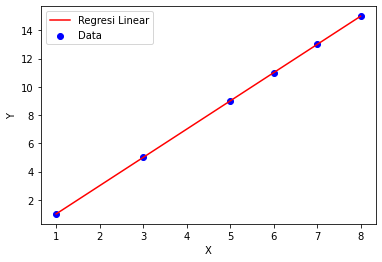

In [ ]:
# Plot Nilai Data
x_max = np.max(X_train)
x_min = np.min(X_train)

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X_train, y_train, color='blue', label='Data')

# Label sumbu
plt.xlabel('X')

# Label sumbu y
plt.ylabel('Y')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

##Implementasi Model Regresi Linear Pada Data Real
Kita akan menggunakan dataset yang berisi ukuran kepala dan berat organ otak.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/Channel-Hobi-Data/main/Model%20Machine%20Learning%20dari%20Dasar(From%20Scratch)%20Python/Dataset/dataset_regresi_linear.csv')
# Melihat ukuran dataset
print(dataset.shape)
# Menampilkan 5 data teratas
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
#Mencari hubungan antara data X(Ukuran Kepala) dan Y(Berat Organ Otak)

# Definisikan Variabel Input(X) dan Output(Y)
X = dataset['Head Size(cm^3)'].values.reshape(-1,1)
Y = dataset['Brain Weight(grams)'].values.reshape(-1,1)

In [ ]:
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
y_rata2 = np.mean(y_train)

# Jumlah data
n = len(X_train)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
  A += (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
  B += (X_train[i] - x_rata2) ** 2

b_1 = A / B
b_0 = y_rata2 - (b_1 * x_rata2)

# Menampilkan Koefisien Regresi Linear
print(b_0, b_1)

[334.26127335] [0.26106902]


Dalam notasi matematika, hasil ini dapat ditulis sebagai berikut:

>Brain weights = 334.26127335 + 0.26106902 * Head size

Sekarang kita memiliki model linier. Mari kita plot secara grafis.

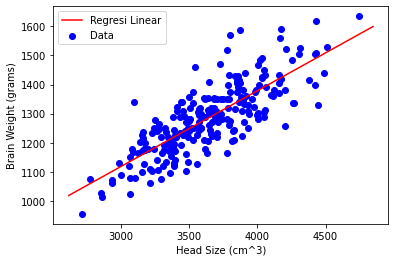

In [ ]:
# Plot Nilai Data
x_max = np.max(X) + 100
x_min = np.min(X) - 100

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X, Y, color='blue', label='Data')

# Label sumbu
plt.xlabel('Head Size (cm^3)')

# Label sumbu y
plt.ylabel('Brain Weight (grams)')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

## **Evaluasi Model**
Kita perlu mengukur tingkat ketepatan(akurasi) model yang telah diperoleh. Terdapat banyak metode untuk
melakukan hal ini, namun pada artikel ini kita memilih menggunakan **Root Mean Square Error** dan **Koefisien Determinasi ($R^2$ Skor)**

**$ RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y_{i}}^2)} $**

$\hat{y_{i}}$ adalah nilai hasil prediksi ke-i. Berikut adalah penulisan kode untuk RMSE

In [ ]:
rmse = 0
for i in range(len(X_test)):
  y_pred= b_0 + b_1* X_test[i]
  rmse += (y_test[i] - y_pred) ** 2
  
rmse = np.sqrt(rmse/n)
print(rmse)

[36.34269155]


Selanjutnya, mari kita hitung nilai **$R^2$**

$R^2=1-\frac{SSE}{SST}=1-\frac{\sum{(\hat{y_{i}}-\bar{y})^2}}{(y_{i}-\bar{y})^2}$

SSE adalah jumlah kuadrat galat sedangkan SST jumlah kuadrat total.

$R^2$ skor biasanya memiliki nilai antara 0 hingga 1. Nilai ini juga bisa bernilai negatif jika model regresi benar-
benar salah. Di bawah ini adalah kode pemrograman untuk menghitung $R^2$ skor

In [ ]:
SST = 0
SSE = 0
y_pred= b_0 + b_1*X_test
y_rata2 = np.mean(y_test)
for i in range(len(X_test)) :
  SST += (y_test[i] - y_rata2) ** 2
  SSE += (y_test[i] - y_pred[i]) **2
  
score = 1- (SSE/SST)
print("Koefisien Determinasi:", score)

Koefisien Determinasi: [0.63763642]
